# Example Application to estimate LAI from spectral and structural data in vineyards
From Sergio's data

## Instructions
If you have not installed pysr, run cell below.

%pip install -U pysr

Julia and Julia dependencies are installed at first import:

In [46]:
import pysr

Now, let's import everything else as well as the PySRRegressor:


In [47]:
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Simple PySR example:


use Sergio's v4 dataset, predict LAI

In [48]:
df = pd.read_csv('RGBNIR_DSM_CHM_VIf_v4.csv')
# print(df.head())
X = df.iloc[:,1:-2]
y = df.LAI
print(X.head())


        Red     Green      Blue       NIR        FC       ch1        CH  \
0  0.020630  0.030237  0.003344  0.219818  0.680556  2.275999  2.451676   
1  0.020253  0.030407  0.003233  0.223823  0.652778  2.180176  2.469830   
2  0.022048  0.030032  0.003725  0.210354  0.598958  2.232824  2.363652   
3  0.022679  0.030747  0.003710  0.220522  0.500000  1.980601  2.298613   
4  0.023883  0.028469  0.003943  0.198092  0.522569  2.300652  2.226254   

         wc        WC      geom  ...      RGRI       RI4XS        SI  \
0  1.076450  0.999317  5.576198  ...  0.682277  509.138228  0.981867   
1  1.077895  0.951482  5.123413  ...  0.666062  479.839566  0.981972   
2  0.965705  0.912254  4.814528  ...  0.734158  597.604433  0.981337   
3  0.908815  0.783081  3.565081  ...  0.737611  575.514103  0.980890   
4  0.817703  0.845029  4.328101  ...  0.838918  868.336743  0.981177   

          SR      TDVI       TGI       TVI      TriVI      VARI   VrNIRBI  
0  10.655179  0.396112  1.949825  1.1525

By default, we will set up 30 populations of expressions (which evolve independently except for migrations),# use 4 threads, and use `"best"` for our model selection strategy:

In [49]:
default_pysr_params = dict(
    populations=30,
    model_selection="best", #"score" is also an option,
    random_state=0, # the lines below ensure reproducible results
    deterministic=True,
    procs=0,
    multithreading=False,
)

PySR can run for arbitrarily long, and continue to find more and more accurate expressions. You can set the total number of cycles of evolution with `niterations`, although there are also a [few more ways](https://github.com/MilesCranmer/PySR/pull/134) to stop execution.

**This first execution will take a bit longer to startup, as the library is JIT-compiled. The next execution will be much faster.**

In [50]:
# Learn equations
model = PySRRegressor(
    niterations=100,
    binary_operators=["+", "*","-","/"],
    # unary_operators=["sqrt", "exp", "log"],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    **default_pysr_params,
)

model.fit(X, y)

c:\Users\alfon\anaconda3\envs\PySR\Lib\site-packages\pysr\sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\alfon\anaconda3\envs\PySR\Lib\site-packages\pysr\sr.py:2823: UserWarning: The `multithreading: bool` parameter has been deprecated in favor of `parallelism: Literal['multithreading', 'serial', 'multiprocessing']`.
Previous usage of `multithreading=True` (default) is now `parallelism='multithreading'`; `multithreading=False, procs=0` is now `parallelism='serial'`; and `multithreading=True, procs={int}` is now `parallelism='multiprocessing', procs={int}`.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 4.670e+04
Progress: 254 / 3000 total iterations (8.467%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.315e+00  1.594e+01  y = 2.3272
3           6.921e-01  3.210e-01  y = wc / FC
5           5.556e-01  1.099e-01  y = wc * (2.3922 - FC)
9           5.053e-01  2.370e-02  y = (wc + (wc / (FC / SAVI))) - 0.29966
11          4.650e-01  4.161e-02  y = ((wc + (NIRv + NIRv)) + (2.0377 - ch1)) * 0.96645
13          4.573e-01  8.363e-03  y = ((wc + NormR) + ((NIRv + NIRv) + (2.0377 - ch1))) * 0....
                                      96645
15          4.252e-01  3.637e-02  y = ((NIR * (((FC * -1.6088) * (wc + 0.65201)) + 4.1439)) ...
                                      * wc) + wc
─────────────────────────────────────────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          2.3272994   
	1         0.344156                                    3.3588142 / ch1   
	2         0.161917                             (wc - ch1) + 2.6553845   
	3   >>>>  0.069583           ((NDSII * -3.8246422) - ch1) / 0.5260373   
	4         0.021508     FC + (((NDSII * -3.4668055) - ch1) / 0.527785)   
	5         0.015205  ((FC * TDVI) + ((NDSII * -3.5292737) - ch1)) /...   
	6         0.005863  (NDSII * -6.482902) + ((((NDTI + FC) * TDVI) -...   
	7         0.001563  (NDTI + (NDSII * -6.680293)) + (((NLI * FC) - ...   
	8         0.034195  (wc * ((((wc * -1.516216) + 10.282754) * NIR) ...   
	9         0.054696  ((NIR * ((wc * -8.177559) + 43.783665)) * ((FC...   
	10        0.006247  (wc * (((wc * -9.496405) + 46.17371) * (NIR * ...   
	11        0.011431  ((((wc * -12.906677) + 45.79119) * wc) * (NIR ...   
	
	        loss  complexity  
	0   1.315314           1  
	1   0.660845           3  
	2   0.478036           5  
	3   0.415931           7  
	4   0.398419           9  
	5   0.386485          11  
	6   0.381980          13  
	7   0.380788          15  
	8   0.355616          17  
	9   0.318766          19  
	10  0.314809          21  
	11  0.307693          23  
]

  - outputs\20250430_110644_khNmBf\hall_of_fame.csv


We can print the model, which will print out all the discovered expressions:

In [51]:
model

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          2.3272994   
	1         0.344156                                    3.3588142 / ch1   
	2         0.161917                             (wc - ch1) + 2.6553845   
	3   >>>>  0.069583           ((NDSII * -3.8246422) - ch1) / 0.5260373   
	4         0.021508     FC + (((NDSII * -3.4668055) - ch1) / 0.527785)   
	5         0.015205  ((FC * TDVI) + ((NDSII * -3.5292737) - ch1)) /...   
	6         0.005863  (NDSII * -6.482902) + ((((NDTI + FC) * TDVI) -...   
	7         0.001563  (NDTI + (NDSII * -6.680293)) + (((NLI * FC) - ...   
	8         0.034195  (wc * ((((wc * -1.516216) + 10.282754) * NIR) ...   
	9         0.054696  ((NIR * ((wc * -8.177559) + 43.783665)) * ((FC...   
	10        0.006247  (wc * (((wc * -9.496405) + 46.17371) * (NIR * ...   
	11        0.011431  ((((wc * -12.906677) + 45.79119) * wc) * (NIR ...   
	
	        loss  complexity  
	0   1.315314           1  
	1   0.660845           3  
	2   0.478036           5  
	3   0.415931           7  
	4   0.398419           9  
	5   0.386485          11  
	6   0.381980          13  
	7   0.380788          15  
	8   0.355616          17  
	9   0.318766          19  
	10  0.314809          21  
	11  0.307693          23  
]

We can also view the SymPy format of the best expression:

In [52]:
model.sympy()

(NDSII*(-3.8246422) - ch1)/0.5260373

We can also view the SymPy of any other expression in the list, using the index of it in `model.equations_`.

In [53]:
model.sympy(2)

-ch1 + wc + 2.6553845

## Output

`model.equations_` is a Pandas DataFrame. We can export the results in various ways:

In [54]:
model.latex()

'\\frac{NDSII \\left(-3.82\\right) - ch_{1}}{0.526}'

These is also `model.sympy(), model.jax(), model.pytorch()`. All of these can take an index as input, to get the result for an arbitrary equation in the list.

We can also use `model.predict` for arbitrary equations, with the default equation being the one chosen by `model_selection`:

ypredict = model.predict(X)
ypredict_simpler = model.predict(X, 2)

print("Default selection MSE:", np.power(ypredict - y, 2).mean())
print("Manual selection MSE for index 2:", np.power(ypredict_simpler - y, 2).mean())

Plotting the first 20 solutions

IndexError: single positional indexer is out-of-bounds

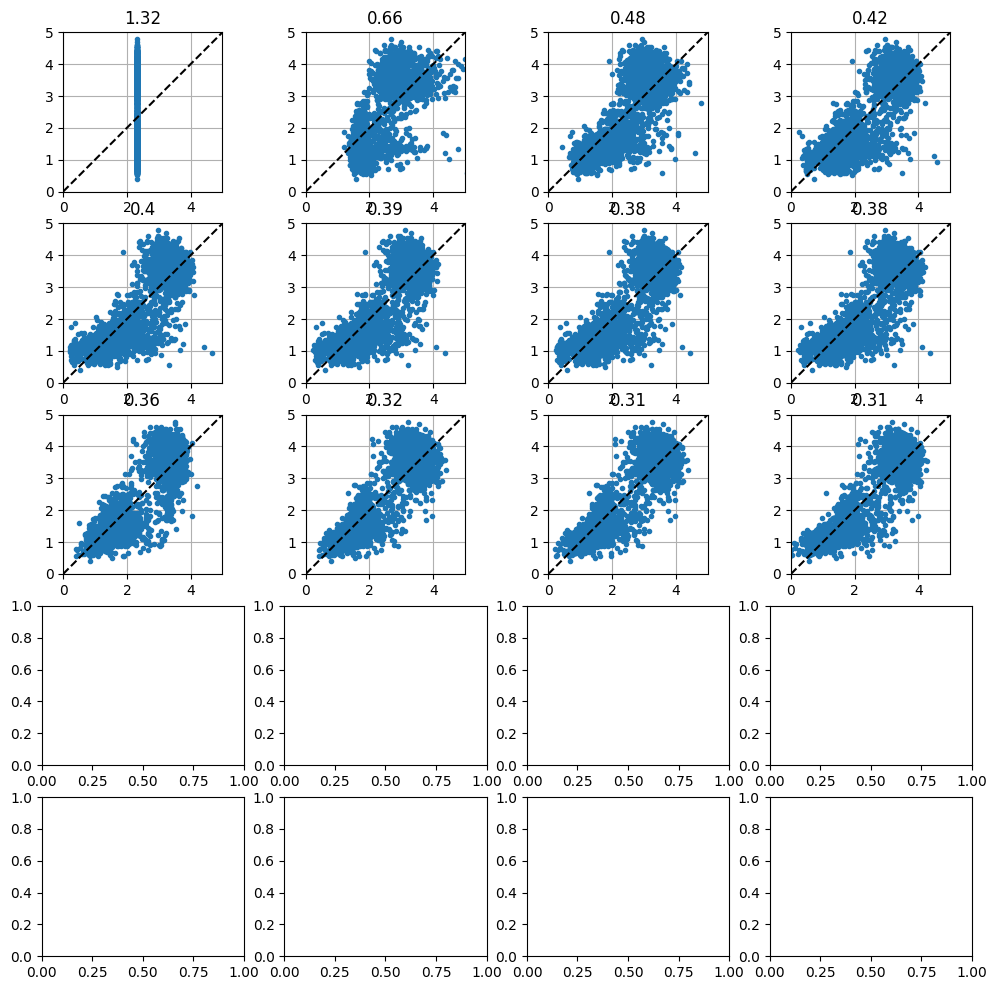

In [55]:
fig, axes = plt.subplots(5, 4, figsize=(12, 12))

it = np.linspace(0,19,20, dtype=int)  # Ensure indices are integers

# Iterate over the subplots and data
for ax, i in zip(axes.flatten(), it):  # Flatten axes for proper iteration
    ypredict_simpler = model.predict(X, index=i)  # Use integer index
    ax.plot(ypredict_simpler, y,'.')
    ax.grid(True)
    # ax.set_xlabel("Modeled LAI")
    # ax.set_ylabel("Measured LAI")
    ax.plot( [0,5], [0,5], linestyle='--', color='k' )

    ax.set_aspect('equal')
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    mse =np.power(ypredict_simpler - y, 2).mean()
    ax.set_title(round(mse,2))
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



Plotting the difference between the predicted and measured LAI

IndexError: single positional indexer is out-of-bounds

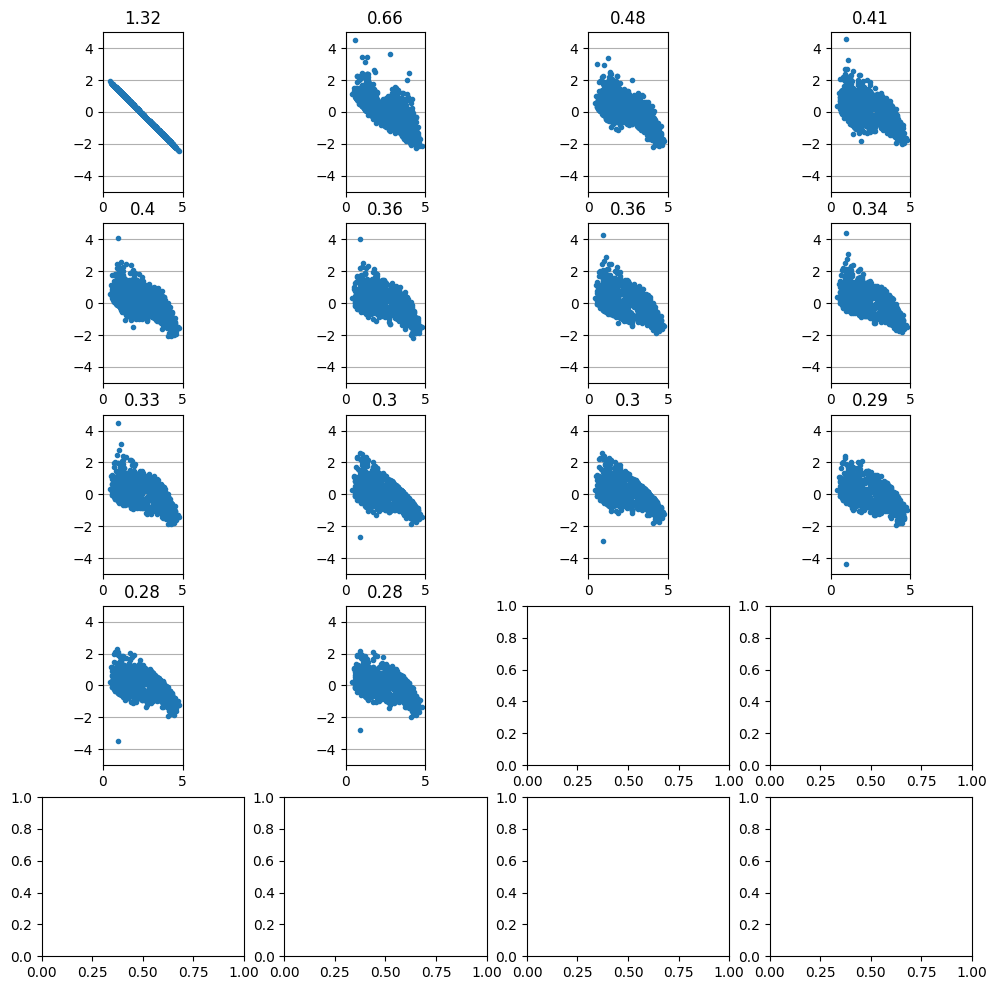

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(12, 12))

it = np.linspace(0,19,20, dtype=int)  # Ensure indices are integers

# Iterate over the subplots and data
for ax, i in zip(axes.flatten(), it):  # Flatten axes for proper iteration
    ypredict_simpler = model.predict(X, index=i)  # Use integer index
    ax.plot(y,ypredict_simpler-y,'.')
    ax.grid(True)
    # ax.set_xlabel("Modeled LAI")
    # ax.set_ylabel("Measured LAI")
    # ax.plot( [0,5], [-5,5], linestyle='--', color='k' )

    ax.set_aspect('equal')
    ax.set_xlim(0, 5)
    ax.set_ylim(-5, 5)
    mse =np.power(ypredict_simpler - y, 2).mean()
    ax.set_title(round(mse,2))
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



# Other PySR Options

The full list of PySR parameters can be found here: https://ai.damtp.cam.ac.uk/pysr/api